In [189]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
path= "/content/drive/MyDrive/netflix_titles.csv"

In [191]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import warnings
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [192]:
netflix = pd.read_csv(path)

# How many movies were on netflix in 2020 compared to tv shows?

In [193]:
#Creating a new datafram for 2020 netflix titles.
netflix_2020 = netflix.loc[netflix['release_year'] == 2020]

In [194]:
# Display an overview of the Movie and TV count
netflix_2020['type'].value_counts()

TV Show    457
Movie      411
Name: type, dtype: int64

In [195]:
pies = ["Movies", "TV Shows"]
pie_votes = netflix_2020['type'].value_counts()
colors = ["red","blue"]
explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x7f18e2af0790>,
 [Text(-0.6922391277661718, -0.9802066057671363, 'Movies'),
  Text(0.6345524496598861, 0.8985227813643001, 'TV Shows')],
 [Text(-0.4038061578636002, -0.5717871866974961, '52.6%'),
  Text(0.3461195179963015, 0.4901033352896182, '47.4%')])

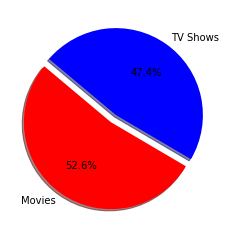

In [196]:
plt.pie(pie_votes, explode=explode,labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

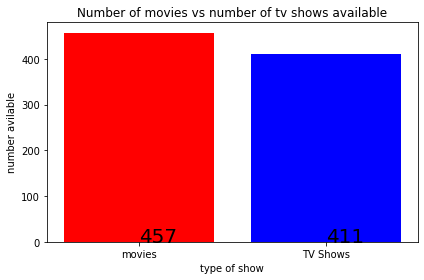

<Figure size 432x288 with 0 Axes>

In [197]:
#Creating a bar graph to show tv shows vs movies available

show = ["movies","TV Shows"]
count = netflix_2020['type'].value_counts()
x_axis = np.arange(len(count))

#Create bar graph, and add labels.
plt.bar(x_axis, count, color=['r','b'], align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, show)
for index,data in enumerate(count):
    plt.text(x=index , y =0 , s=f"{data}" , fontdict=dict(fontsize=20))
plt.title("Number of movies vs number of tv shows available")
plt.xlabel("type of show")
plt.ylabel("number avilable")


plt.tight_layout()

plt.show()
plt.savefig("/content/drive/MyDrive/Images/bar_movie_tvshow.png")

# Comparing the 2019 (pre-pandemic) quarterly revenue and memberships to 2020 (pandemic time frame).

In [198]:
#Reading in the financial data excel file
q1_21_financials = pd.read_excel("/content/drive/MyDrive/Q1_2021_Financials.xlsx",sheet_name=['Income Statement','Balance Sheet','Cashflow','Regional Information'])

In [199]:
income_df = pd.DataFrame(q1_21_financials['Income Statement'])

In [200]:
income_df.columns = income_df.iloc[4]

In [201]:
income_df.columns = ['NaN1','NaN2','NaN3','NaN4','NaN5','March 31, 2019', 'June 30, 2019', 'September 30, 2019', 'December 31, 2019','December 31, 2019', 'March 31, 2020', 'June 30, 2020', 'September 30, 2020', 'December 31, 2020','December 31, 2020','March 31, 2021']

In [202]:
#Dropping unnessesary rows and columns 
income_df = income_df.drop(['NaN3', 'NaN4','NaN5'], axis=1)
income_df = income_df.drop([0,1,2,3,4,5,6])

#Resetting index after dropping rows
income_df = income_df.reset_index()

In [203]:
rev_data_list = income_df.values.tolist()

In [204]:
#Creating a revenue list
revenue_list = rev_data_list[0]
revenue_list

[7,
 'Revenues',
 nan,
 4520992,
 4923116,
 5244905,
 5467434,
 20156447,
 5767691,
 6148286,
 6435637,
 6644442,
 24996056,
 7163282]

In [205]:
#Creating two indices lists to grab the appropraite revenue values for 2019 and 2020 from the revenue list created in the previous cell
indices1 = [3,4,5,6]
indices2 = [8,9,10,11]

revenue_19 = [revenue_list[index] for index in indices1]
revenue_20 = [revenue_list[index] for index in indices2]

print(revenue_19)
print(revenue_20)

[4520992, 4923116, 5244905, 5467434]
[5767691, 6148286, 6435637, 6644442]


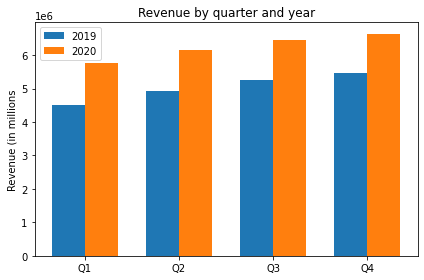

<Figure size 432x288 with 0 Axes>

In [206]:
#creating a quarters list for x axis.
quarters = ['Q1', 'Q2', 'Q3', 'Q4']


x = np.arange(len(quarters))
width = 0.35 

#Creating subplots for double bar charts.
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, revenue_19, width, label='2019')
rects2 = ax.bar(x + width/2, revenue_20, width, label='2020')

#Naming x and y axis and creating ticks.
ax.set_ylabel('Revenue (in millions')
ax.set_title('Revenue by quarter and year')
ax.set_xticks(x)
ax.set_xticklabels(quarters)
ax.legend()

fig.tight_layout()

plt.show()
plt.savefig("/content/drive/MyDrive/Images/bar_revenue_quarter_year.png")

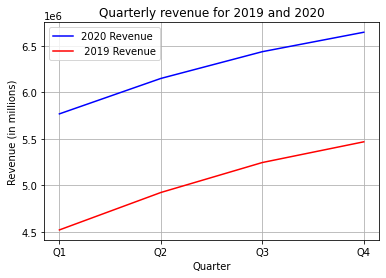

<Figure size 432x288 with 0 Axes>

In [207]:
#Creating lines for 2019 and 2020 revenue
rev_2019, = plt.plot(quarters, revenue_19, color="red", label=" 2019 Revenue")
rev_2020, = plt.plot(quarters, revenue_20, color="blue", label="2020 Revenue")
#naming title and x and y axis.
plt.title("Quarterly revenue for 2019 and 2020")
plt.xlabel("Quarter")
plt.ylabel("Revenue (in millions)")

#Creating graph legend
plt.legend(handles=[rev_2020, rev_2019], loc="best")
#Adding grid
plt.grid()
#plot line graph
plt.show()
plt.savefig("/content/drive/MyDrive/Images/line_revenue_quarter_year.png")

In [208]:
#Creating a new dataframe for the membership data for 2019 and 2020
subscriber_df = pd.DataFrame(q1_21_financials['Regional Information'])

subscriber_df.columns = subscriber_df.iloc[4]

In [209]:
#Renaming columns to contain quarter and year
subscriber_df.columns = ['Area','Membership totals','Nan1','Nan2','Nan3','Nan4','March 31, 2019', 'June 30, 2019', 'September 30, 2019', 'December 31, 2019','December 31, 2019', 'March 31, 2020', 'June 30, 2020', 'September 30, 2020', 'December 31, 2020','December 31, 2020','March 31, 2021']

In [210]:
#Dropping unnessesary columns and rows
subscriber_df = subscriber_df.drop(['Nan1', 'Nan2','Nan3','Nan4'], axis=1)
subscriber_df = subscriber_df.drop([0,1,2,3,4,5,6])

#Resetting the index after dropping rows.
subscriber_df = subscriber_df.reset_index()

In [211]:
#creating dataframe for just US data
us_subscriber_df = subscriber_df.head(8)

In [212]:
#Appending the memebership data to a list for graphing
subscriber_list = us_subscriber_df.values.tolist()

In [213]:
#Storing the total paid memberships for 2019 and 2020 in a list
paid_memberships = subscriber_list[3]
paid_memberships

[10,
 nan,
 'Paid memberships at end of period',
 66633,
 66501,
 67114,
 67662,
 67662,
 69969,
 72904,
 73081,
 73936,
 73936,
 74384]

In [214]:
#Created two indices lists to grab the correct values for 2019 and 2020 total quarterly memeberships
indices3 = [3,4,5,6]
indices4 = [8,9,10,11]

memberships_19 = [paid_memberships[index] for index in indices3]
memberships_20 = [paid_memberships[index] for index in indices4]

print(memberships_19)
print(memberships_20)

[66633, 66501, 67114, 67662]
[69969, 72904, 73081, 73936]


In [215]:
#Converting list values to an int for graphing
memberships_19 = list(map(int, memberships_19))
memberships_20 = list(map(int,memberships_20))

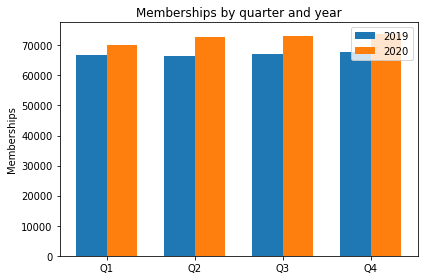

<Figure size 432x288 with 0 Axes>

In [216]:
x = np.arange(len(quarters))
width = 0.35 

#Creating subplots for double bar charts.
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, memberships_19, width, label='2019')
rects2 = ax.bar(x + width/2, memberships_20, width, label='2020')

#Naming x and y axis and creating ticks.
ax.set_ylabel('Memberships')
ax.set_title('Memberships by quarter and year')
ax.set_xticks(x)
ax.set_xticklabels(quarters)

ax.legend()

fig.tight_layout()

plt.show()
plt.savefig("/content/drive/MyDrive/Images/bar_memberships_quarter_year.png")

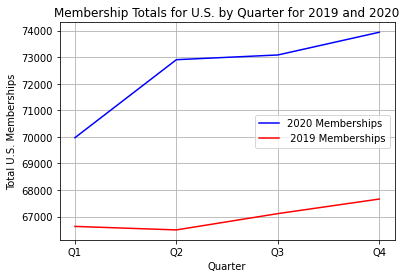

<Figure size 432x288 with 0 Axes>

In [217]:
#Creating lines for 2019 and 2020 revenue
mems_2019, = plt.plot(quarters, memberships_19, color="red", label=" 2019 Memberships")
mems_2020, = plt.plot(quarters, memberships_20, color="blue", label="2020 Memberships")
#naming title and x and y axis.
plt.title("Membership Totals for U.S. by Quarter for 2019 and 2020")
plt.xlabel("Quarter")
plt.ylabel("Total U.S. Memberships")

#Creating graph legend
plt.legend(handles=[mems_2020, mems_2019], loc="best")
#Adding grid
plt.grid()
#plot line graph
plt.show()
plt.savefig("/content/drive/MyDrive/Images/line_memberships_quarter_year.png")